In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta,date
import matplotlib.pyplot as plt
import folium
import plotly.express as px
from matplotlib import ticker 
from scipy.interpolate import make_interp_spline, BSpline
import pycountry_convert as pc
#import geopandas as gpd

## Interactive web-based dashboard https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

## COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University
### https://github.com/CSSEGISandData/COVID-19/

### Get Data

In [142]:
df = pd.read_csv( 'covid19_confirmed_deaths_us.csv' )

In [143]:
df.head()

,FIPS,Admin2,Province_State,date,confirmed,Population,deaths
0,1001.0,Autauga,Alabama,1/22/20,0,55869,0
1,1003.0,Baldwin,Alabama,1/22/20,0,223234,0
2,1005.0,Barbour,Alabama,1/22/20,0,24686,0
3,1007.0,Bibb,Alabama,1/22/20,0,22394,0
4,1009.0,Blount,Alabama,1/22/20,0,57826,0


In [144]:
df[df['FIPS'].isnull()]

,FIPS,Admin2,Province_State,date,confirmed,Population,deaths
1267,NaN,Dukes and Nantucket,Massachusetts,1/22/20,0,0,0
1304,NaN,Federal Correctional Institution (FCI),Michigan,1/22/20,0,0,0
1336,NaN,Michigan Department of Corrections (MDOC),Michigan,1/22/20,0,0,0
1591,NaN,Kansas City,Missouri,1/22/20,0,488943,0
2954,NaN,Bear River,Utah,1/22/20,0,0,0
...,...,...,...,...,...,...,...
888059,NaN,Central Utah,Utah,10/13/20,908,0,6
888078,NaN,Southeast Utah,Utah,10/13/20,308,0,2
888079,NaN,Southwest Utah,Utah,10/13/20,4990,0,45
888082,NaN,TriCounty,Utah,10/13/20,295,0,2


In [145]:
df = df.dropna(subset = ['FIPS'])

In [149]:
df['FIPS'] = df['FIPS'].astype(int)
df = df.rename(columns={"Admin2": "County"})

In [150]:
df.head()

,FIPS,County,Province_State,date,confirmed,Population,deaths
0,1001,Autauga,Alabama,1/22/20,0,55869,0
1,1003,Baldwin,Alabama,1/22/20,0,223234,0
2,1005,Barbour,Alabama,1/22/20,0,24686,0
3,1007,Bibb,Alabama,1/22/20,0,22394,0
4,1009,Blount,Alabama,1/22/20,0,57826,0


In [197]:
df_today = df[df['date']=='10/13/20']

In [198]:
df_today

,FIPS,County,Province_State,date,confirmed,Population,deaths
885100,1001,Autauga,Alabama,10/13/20,1924,55869,28
885101,1003,Baldwin,Alabama,10/13/20,6248,223234,65
885102,1005,Barbour,Alabama,10/13/20,951,24686,9
885103,1007,Bibb,Alabama,10/13/20,744,22394,12
885104,1009,Blount,Alabama,10/13/20,1742,57826,16
...,...,...,...,...,...,...,...
888435,56039,Teton,Wyoming,10/13/20,679,23464,1
888436,56041,Uinta,Wyoming,10/13/20,384,20226,2
888437,90056,Unassigned,Wyoming,10/13/20,0,0,0
888438,56043,Washakie,Wyoming,10/13/20,127,7805,7


In [199]:
df_today['normalized_confirmed'] = df_today['confirmed']/df_today['Population']

<ipython-input-199-9f4a41db3a9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_today['normalized_confirmed'] = df_today['confirmed']/df_today['Population']


In [200]:
df_today['normalized_deaths'] = df_today['deaths']/df_today['Population']

<ipython-input-200-985784877b5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_today['normalized_deaths'] = df_today['deaths']/df_today['Population']


In [201]:
df_today

,FIPS,County,Province_State,date,confirmed,Population,deaths,normalized_confirmed,normalized_deaths
885100,1001,Autauga,Alabama,10/13/20,1924,55869,28,0.034438,0.000501
885101,1003,Baldwin,Alabama,10/13/20,6248,223234,65,0.027989,0.000291
885102,1005,Barbour,Alabama,10/13/20,951,24686,9,0.038524,0.000365
885103,1007,Bibb,Alabama,10/13/20,744,22394,12,0.033223,0.000536
885104,1009,Blount,Alabama,10/13/20,1742,57826,16,0.030125,0.000277
...,...,...,...,...,...,...,...,...,...
888435,56039,Teton,Wyoming,10/13/20,679,23464,1,0.028938,0.000043
888436,56041,Uinta,Wyoming,10/13/20,384,20226,2,0.018985,0.000099
888437,90056,Unassigned,Wyoming,10/13/20,0,0,0,NaN,NaN
888438,56043,Washakie,Wyoming,10/13/20,127,7805,7,0.016272,0.000897


###  Face Mask 

#### Mask-Wearing Survey Data

The New York Times is releasing estimates of mask usage by county in the United States.

This data comes from a large number of interviews conducted online by the global data and survey firm Dynata at the request of The New York Times. The firm asked a question about mask use to obtain 250,000 survey responses between July 2 and July 14, enough data to provide estimates more detailed than the state level. (Several states have imposed new mask requirements since the completion of these interviews.)

Specifically, each participant was asked: How often do you wear a mask in public when you expect to be within six feet of another person?

This survey was conducted a single time, and at this point we have no plans to update the data or conduct the survey again.

#### Methodology
To transform raw survey responses into county-level estimates, the survey data was weighted by age and gender, and survey respondents’ locations were approximated from their ZIP codes. Then estimates of mask-wearing were made for each census tract by taking a weighted average of the 200 nearest responses, with closer responses getting more weight in the average. These tract-level estimates were then rolled up to the county level according to each tract’s total population.

By rolling the estimates up to counties, it reduces a lot of the random noise that is seen at the tract level. In addition, the shapes in the map are constructed from census tracts that have been merged together — this helps in displaying a detailed map, but is less useful than county-level in analyzing the data.

In [202]:
# Mask_use shows for 3142 county, the frequency of the mask use for each county

In [203]:
mask_use = pd.read_csv('../covid-19-data/mask-use/mask-use-by-county.csv')
mask_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   COUNTYFP    3142 non-null   int64  
 1   NEVER       3142 non-null   float64
 2   RARELY      3142 non-null   float64
 3   SOMETIMES   3142 non-null   float64
 4   FREQUENTLY  3142 non-null   float64
 5   ALWAYS      3142 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 147.4 KB


In [204]:
mask_use.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459


In [205]:
mask_use = mask_use.rename(columns={"COUNTYFP": "FIPS"})
mask_use.head()

,FIPS,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459


### Get the population of the county data

In [206]:
# Get the population of the county data
#url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv"
#df_pop = pd.read_csv( url )

In [207]:
#df_pop.head()

In [208]:
# Drop the rows with NaN in columns FIPS and Admin2
#df_pop = df_pop.dropna(subset=['FIPS','Admin2'])

In [209]:
# Change the data type from float to integer 
#df_pop.FIPS = df_pop.FIPS.astype(int)

In [210]:
#df_pop.head()

In [211]:
# inner join the two table 
#columns = ['FIPS','Population','NEVER','RARELY','SOMETIMES','FREQUENTLY','ALWAYS']
#df_merge = pd.merge(df_pop,mask_use, on='FIPS')[columns]
#df_merge.head()

In [212]:
df_merge = pd.merge(mask_use,df_today, on='FIPS')

In [213]:
df_merge.head()

,FIPS,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,County,Province_State,date,confirmed,Population,deaths,normalized_confirmed,normalized_deaths
0,1001,0.053,0.074,0.134,0.295,0.444,Autauga,Alabama,10/13/20,1924,55869,28,0.034438,0.000501
1,1003,0.083,0.059,0.098,0.323,0.436,Baldwin,Alabama,10/13/20,6248,223234,65,0.027989,0.000291
2,1005,0.067,0.121,0.120,0.201,0.491,Barbour,Alabama,10/13/20,951,24686,9,0.038524,0.000365
3,1007,0.020,0.034,0.096,0.278,0.572,Bibb,Alabama,10/13/20,744,22394,12,0.033223,0.000536
4,1009,0.053,0.114,0.180,0.194,0.459,Blount,Alabama,10/13/20,1742,57826,16,0.030125,0.000277


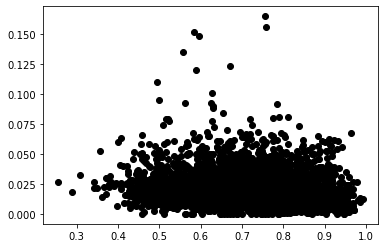

In [214]:
plt.plot(df_merge['ALWAYS']+df_merge['FREQUENTLY'], df_merge['normalized_confirmed'], 'o', color='black');

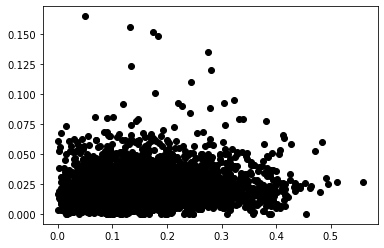

In [215]:
plt.plot(df_merge['NEVER']+df_merge['RARELY'], df_merge['normalized_confirmed'], 'o', color='black');

In [621]:
df1 = df_merge_filter.sort_values(by='ALWAYS',ascending=False).head(50)
county_always = df1[(df1['Population']<40000)]['FIPS'].to_numpy()
print(county_always)

[ 6027 36123  6051 36099 36121 24019 24041 35006 42131 48177 48123 36095
 51001]


/Users/yingli/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:396: UserWarning:

FixedFormatter should only be used together with FixedLocator



<AxesSubplot:>

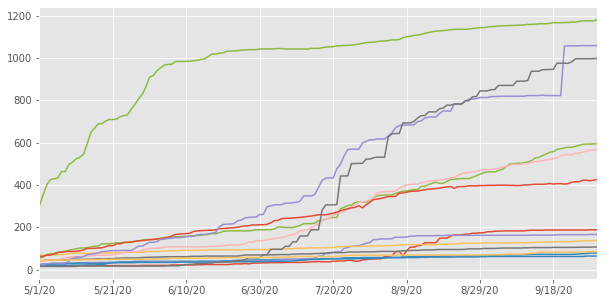

In [625]:
df_confirmed_by_FIPS.loc[county_always,:].T.loc['5/1/20':,:].plot(use_index=True, figsize=(10,5), legend=None)

In [475]:
df_merge['Population'].mean()

104468.84627625716

In [569]:
# Select two segment, 1) wear mask more 2) wear mask less
county_always = df_merge[ ((df_merge['ALWAYS'] + df_merge['FREQUENTLY']) >=0.8)  & (df_merge['Population']>80000) & (df_merge['Population']<130000)]['FIPS'].to_numpy()
print(county_always)

county_never = mask_use[ ((mask_use['NEVER'] + mask_use['RARELY'] + mask_use['SOMETIMES']) >=0.45) & (df_merge['Population']>80000) & (df_merge['Population']<130000)]['FIPS'].to_numpy()
print(county_never)

[ 2170  5045  5051  6045  6057  6101  9015 13059 13095 17037 17093 17099
 17115 19169 20045 24009 24015 24037 24045 25003 26017 26055 26091 26111
 29165 33009 34009 34019 34041 35045 36013 36015 36019 36045 36069 36075
 36079 36089 36101 36109 36117 37027 37089 37125 37127 37191 37195 39055
 41003 41033 41043 41053 41071 42001 42039 42063 42073 42081 42085 42097
 44005 44009 45057 48021 48183 48291 48397 48451 48469 51003 51069 51085
 51121 51161 51680 51740 53015 53021 53025 53029 53057]
[ 1043  5131 13115 13297 13313 16005 16019 16083 19193 27141 29021 29097
 30013 30029 30063 38015 39119 39157 47141 55027 55039 55117]


In [570]:
# ((mask_use['NEVER'] + mask_use['RARELY'] + mask_use['SOMETIMES']) >=0.45)

df_merge[df_merge['FIPS']==6101]['Population']

236    96971.0
Name: Population, dtype: float64

/Users/yingli/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:396: UserWarning:

FixedFormatter should only be used together with FixedLocator



<AxesSubplot:>

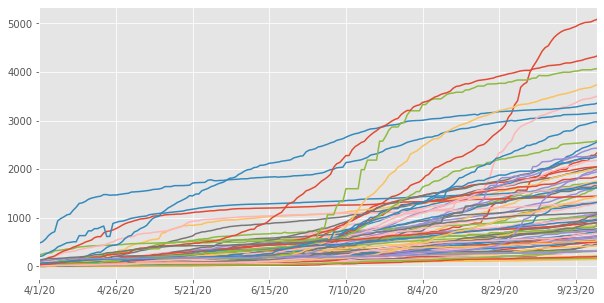

In [571]:
df_confirmed_by_FIPS.loc[county_always,:].T.loc['4/1/20':,:].plot(use_index=True, figsize=(10,5), legend=None)

/Users/yingli/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:396: UserWarning:

FixedFormatter should only be used together with FixedLocator



<AxesSubplot:>

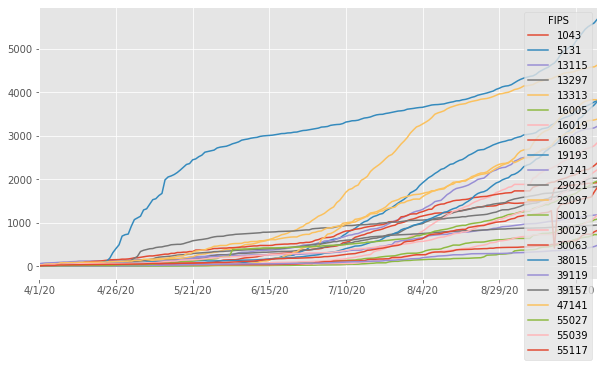

In [572]:
df_confirmed_by_FIPS.loc[county_never,:].T.loc['4/1/20':,:].plot(use_index=True, figsize=(10,5))

In [335]:
mask_use.sort_values('ALWAYS',ascending=False).head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
199,6027,0.033,0.011,0.008,0.058,0.889
1889,36123,0.000,0.006,0.023,0.087,0.884
2637,48229,0.013,0.003,0.076,0.029,0.880
211,6051,0.011,0.026,0.012,0.070,0.880
2593,48141,0.007,0.007,0.033,0.075,0.877


In [336]:
dmask = mask_use[mask_use['COUNTYFP'] == 6027].drop('COUNTYFP',axis=1).to_numpy().flatten()

/Users/yingli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 



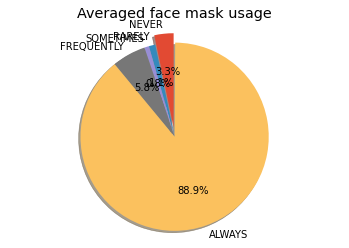

In [337]:
plt.style.use('ggplot')
plt.title('Averaged face mask usage')
#fig1, ax1 = plt.subplots()
explode = (0.1, 0, 0, 0, 0) 
labels = ['NEVER', 'RARELY','SOMETIMES','FREQUENTLY','ALWAYS']
plt.pie(dmask, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [338]:
mask_use.sort_values('ALWAYS',ascending=False).tail()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
1633,30071,0.229,0.114,0.214,0.296,0.147
1640,30085,0.169,0.246,0.178,0.261,0.146
1625,30055,0.142,0.274,0.179,0.267,0.139
1607,30019,0.172,0.244,0.186,0.269,0.129
1650,30105,0.172,0.235,0.187,0.291,0.115


In [339]:
dmask = mask_use[mask_use['COUNTYFP'] == 30105].drop('COUNTYFP',axis=1).to_numpy().flatten()

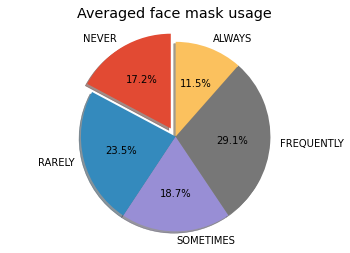

In [340]:
plt.style.use('ggplot')
plt.title('Averaged face mask usage')
#fig1, ax1 = plt.subplots()
explode = (0.1, 0, 0, 0, 0) 
labels = ['NEVER', 'RARELY','SOMETIMES','FREQUENTLY','ALWAYS']
plt.pie(dmask, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [341]:
# 3340 counties, check if there is NA 
df_confirmed_US['FIPS'].isnull().sum()

10

In [342]:
# Drop the rows if the FIPS is NA
df_confirmed_US = df_confirmed_US.dropna(subset=['FIPS'])

# Filter the data
drop_col = ["UID","iso2","iso3","code3","Province_State","County","Country_Region","Lat","Long_","Combined_Key"]
df_confirmed_by_FIPS = df_confirmed_US.drop(drop_col, axis=1).set_index('FIPS')

# change the index from float to int
df_confirmed_by_FIPS.index = df_confirmed_by_FIPS.index.astype(int)

In [423]:
# Select two segment, 1) wear mask more 2) wear mask less
county_always = mask_use[ ((mask_use['ALWAYS'] + mask_use['FREQUENTLY']) >=0.95)  & ((mask_use['NEVER'] + mask_use['RARELY'] + mask_use['SOMETIMES'])<0.1) ]['COUNTYFP'].to_numpy()
print(county_always)

county_never = mask_use[ (mask_use['NEVER'] + mask_use['RARELY'] + mask_use['SOMETIMES']) >=0.6]['COUNTYFP'].to_numpy()
print(county_never)

[ 6025  6033  6045  6051  8037  8047  8097  9013 10005 12087 20045 24019
 24041 24047 25015 34009 36021 36027 36037 36069 36079 36107 36121 36123
 42083 44001 48013 48141 48209 48237 48377 48453 51073 51095 51115 51181
 51830 53009 53055]
[19053 19081 19091 19197 20065 20163 29091 29105 29149 29203 29215 29229
 30019 31185 38005 38071 38095 40039 46035 46051]


In [444]:
df_table.rename(columns={"C": "County"})

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
755,63072001,PR,PRI,630.0,72001,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",19483.0
756,63072003,PR,PRI,630.0,72003,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",41959.0
757,63072005,PR,PRI,630.0,72005,Aguadilla,Puerto Rico,US,18.459681,-67.120815,"Aguadilla, Puerto Rico, US",60949.0
758,63072007,PR,PRI,630.0,72007,Aguas Buenas,Puerto Rico,US,18.251619,-66.126806,"Aguas Buenas, Puerto Rico, US",28659.0
759,63072009,PR,PRI,630.0,72009,Aibonito,Puerto Rico,US,18.131361,-66.264131,"Aibonito, Puerto Rico, US",25900.0


In [447]:
mask_use = mask_use.rename(columns={"COUNTYFP": "FIPS"})
mask_use.head()

,FIPS,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459


In [450]:
df_new = pd.merge(df_table,mask_use, on='FIPS')

In [456]:
df_new['Population'].min()

86.0

/Users/yingli/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:396: UserWarning:

FixedFormatter should only be used together with FixedLocator



<AxesSubplot:>

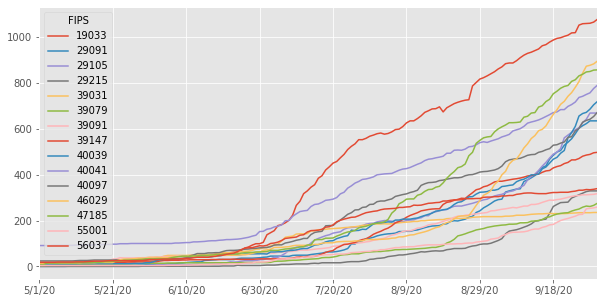

In [492]:
df_confirmed_by_FIPS.loc[county_never,:].T.loc['5/1/20':,:].plot(use_index=True, figsize=(10,5))

/Users/yingli/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:396: UserWarning:

FixedFormatter should only be used together with FixedLocator



<AxesSubplot:>

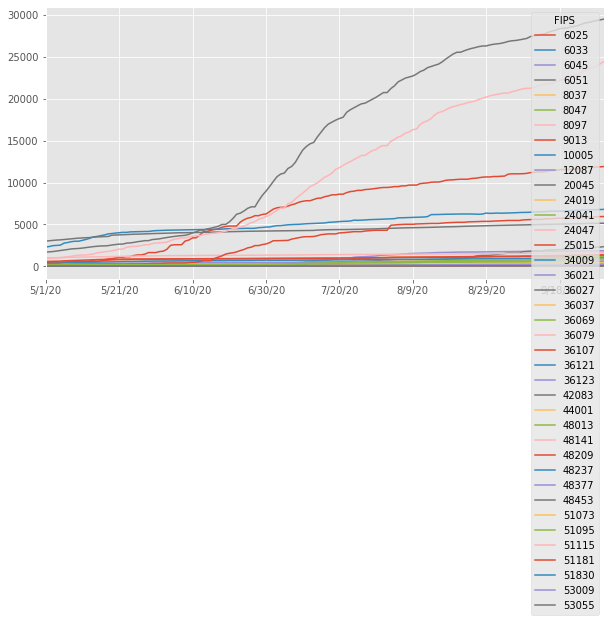

In [420]:
df_confirmed_by_FIPS.loc[county_always,:].T.loc['5/1/20':,:].plot(use_index=True, figsize=(10,5))


/Users/yingli/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:396: UserWarning:

FixedFormatter should only be used together with FixedLocator



<AxesSubplot:>

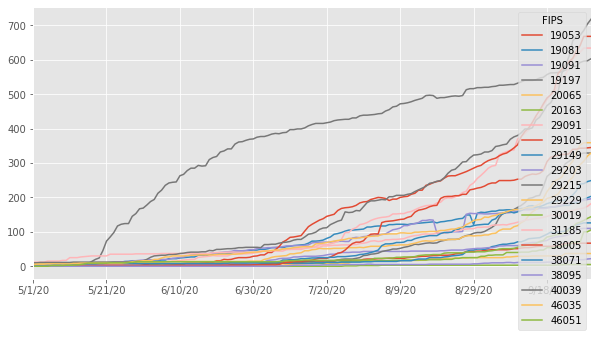

In [421]:
df_confirmed_by_FIPS.loc[county_never,:].T.loc['5/1/20':,:].plot(use_index=True, figsize=(10,5))

/Users/yingli/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:396: UserWarning:

FixedFormatter should only be used together with FixedLocator



<AxesSubplot:>

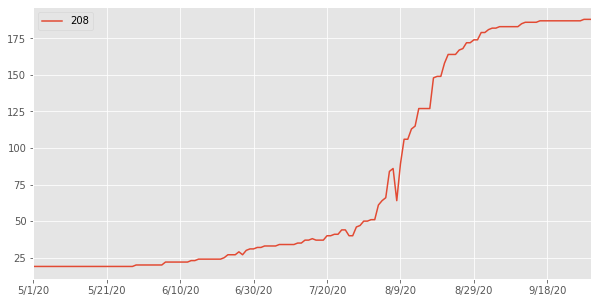

In [252]:
aa = df_confirmed_by_FIPS[df_confirmed_by_FIPS['FIPS']==6027.0].T.drop('FIPS',axis=0)
aa.loc['5/1/20':,:].plot(use_index=True, figsize=(10,5))